In [ ]:
# Then run your original code block again:
import zipfile
zip_ref = zipfile.ZipFile("/content/archive.zip", 'r')
zip_ref.extractall('/content/sample_data')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
# Corrected import statement: layers should be plural
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras import Sequential

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/sample_data/dogs_vs_cats/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/sample_data/dogs_vs_cats/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# Create CNN Model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 77ms/step - accuracy: 0.5781 - loss: 1.8168 - val_accuracy: 0.6882 - val_loss: 0.5892
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 87ms/step - accuracy: 0.7293 - loss: 0.5449 - val_accuracy: 0.7594 - val_loss: 0.5292
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 84ms/step - accuracy: 0.7708 - loss: 0.4784 - val_accuracy: 0.7276 - val_loss: 0.5308
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 87ms/step - accuracy: 0.8193 - loss: 0.4040 - val_accuracy: 0.7812 - val_loss: 0.4536
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 84ms/step - accuracy: 0.8442 - loss: 0.3623 - val_accuracy: 0.8184 - val_loss: 0.4361
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 82ms/step - accuracy: 0.8892 - loss: 0.2620 - val_accuracy: 0.8104 - val_loss: 0.4462
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.9271 - loss: 0.1839 - val_accuracy: 0.8180 - val_loss: 0.6116
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.9572 - loss: 0.1092 - 

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

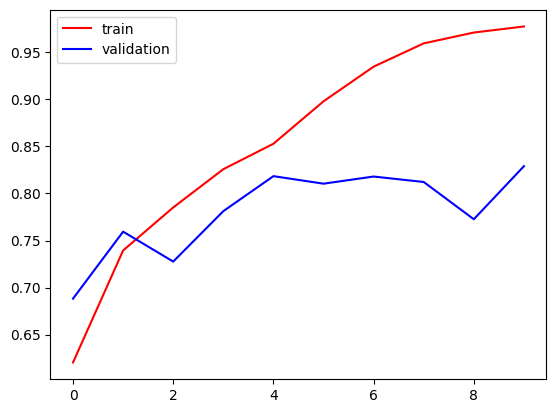

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

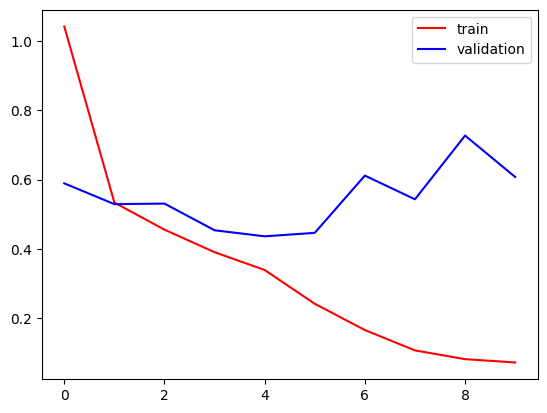

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted: Dog
Prediction Score: 0.9974311


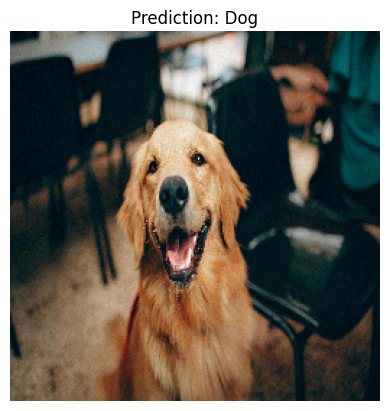

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

test_img = cv2.imread('/content/Dog1.jpg')
test_img = cv2.resize(test_img, (256, 256))
test_img_for_plot = test_img.copy()

# Normalize pixel values for model prediction and ensure correct shape and type
test_img = test_img / 255.0
test_input = test_img.reshape((1, 256, 256, 3)).astype('float32')

prediction = model.predict(test_input)

if prediction[0][0] > 0.5:
    print("Predicted: Dog")
else:
    print("Predicted: Cat")

print("Prediction Score:", prediction[0][0])

# Convert the image used for plotting back to uint8 for cv2.cvtColor
# You could also use the original test_img_for_plot here directly
test_img_for_plot = test_img_for_plot.astype('uint8')


# Convert the image from BGR to RGB for matplotlib
plt.imshow(cv2.cvtColor(test_img_for_plot, cv2.COLOR_BGR2RGB))

plt.title("Prediction: " + ("Dog" if prediction[0][0] > 0.5 else "Cat"))
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted: Cat
Prediction Score: 1.3197287e-05


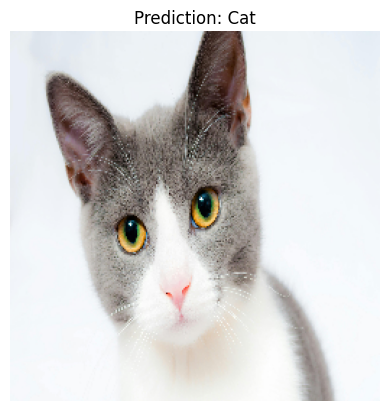

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

test_img = cv2.imread('/content/Cat.jpg')
test_img = cv2.resize(test_img, (256, 256))

# Keep a copy of the original-type image for plotting
test_img_for_plot = test_img.copy()

# Normalize pixel values for model prediction and ensure correct shape and type
test_img = test_img / 255.0
test_input = test_img.reshape((1, 256, 256, 3)).astype('float32')

prediction = model.predict(test_input)

if prediction[0][0] > 0.5:
    print("Predicted: Dog")
else:
    print("Predicted: Cat")

print("Prediction Score:", prediction[0][0])

# Convert the image used for plotting back to uint8 for cv2.cvtColor
# You could also use the original test_img_for_plot here directly
test_img_for_plot = test_img_for_plot.astype('uint8')


# Convert the image from BGR to RGB for matplotlib
plt.imshow(cv2.cvtColor(test_img_for_plot, cv2.COLOR_BGR2RGB))

plt.title("Prediction: " + ("Dog" if prediction[0][0] > 0.5 else "Cat"))
plt.axis('off')
plt.show()